## EDA

In [1]:
# !pip install datasets

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from PIL import Image
from datasets import load_dataset
import numpy as np
from tqdm.notebook import tqdm

In [3]:
# Load dataset in streaming mode
ds = load_dataset("MITLL/LADI-v2-dataset", streaming=True)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


README.md:   0%|          | 0.00/7.49k [00:00<?, ?B/s]

Resolving data files:   0%|          | 0/41 [00:00<?, ?it/s]

Resolving data files:   0%|          | 0/41 [00:00<?, ?it/s]

Resolving data files:   0%|          | 0/41 [00:00<?, ?it/s]

In [6]:
print(ds) # Inspect the dataset

IterableDatasetDict({
    train: IterableDataset({
        features: ['image', 'bridges_any', 'buildings_any', 'buildings_affected_or_greater', 'buildings_minor_or_greater', 'debris_any', 'flooding_any', 'flooding_structures', 'roads_any', 'roads_damage', 'trees_any', 'trees_damage', 'water_any'],
        n_shards: 40
    })
    validation: IterableDataset({
        features: ['image', 'bridges_any', 'buildings_any', 'buildings_affected_or_greater', 'buildings_minor_or_greater', 'debris_any', 'flooding_any', 'flooding_structures', 'roads_any', 'roads_damage', 'trees_any', 'trees_damage', 'water_any'],
        n_shards: 40
    })
    test: IterableDataset({
        features: ['image', 'bridges_any', 'buildings_any', 'buildings_affected_or_greater', 'buildings_minor_or_greater', 'debris_any', 'flooding_any', 'flooding_structures', 'roads_any', 'roads_damage', 'trees_any', 'trees_damage', 'water_any'],
        n_shards: 40
    })
})


In [9]:
# Iterate over the dataset directly
for i, example in enumerate(ds['train']):
    image = example['image']
    print(f"Image size: {image.size}")
    if i == 0:
        break



Image size: (1800, 1200)


In [10]:
image_sizes = set()

# Iterate over the dataset to collect image sizes
for i, example in enumerate(ds['train']):
    image = example['image']
    image_sizes.add(image.size)

    if i > 1000:  #
        break

# Check the unique sizes
print(f"Unique image sizes in the dataset: {image_sizes}")

if len(image_sizes) == 1:
    print(f"All images are of size: {image_sizes.pop()}")
else:
    print(f"Found different image sizes: {image_sizes}")


Unique image sizes in the dataset: {(1800, 1199), (1800, 1192), (1600, 1200), (1200, 1800), (1793, 1200), (1800, 1200), (1795, 1200), (1754, 1200), (1798, 1200), (1800, 1196)}
Found different image sizes: {(1800, 1199), (1800, 1192), (1600, 1200), (1200, 1800), (1793, 1200), (1800, 1200), (1795, 1200), (1754, 1200), (1798, 1200), (1800, 1196)}


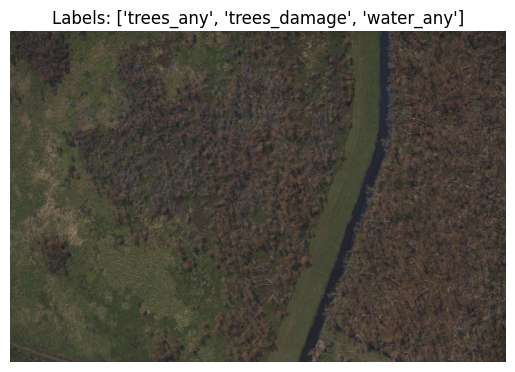

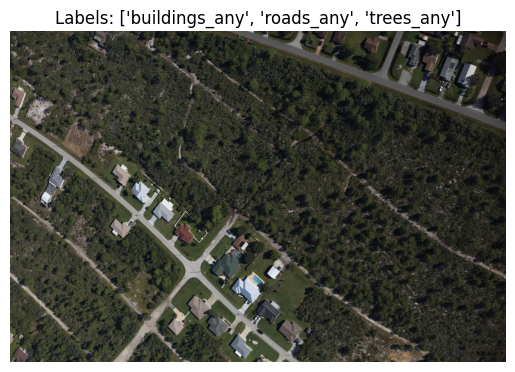

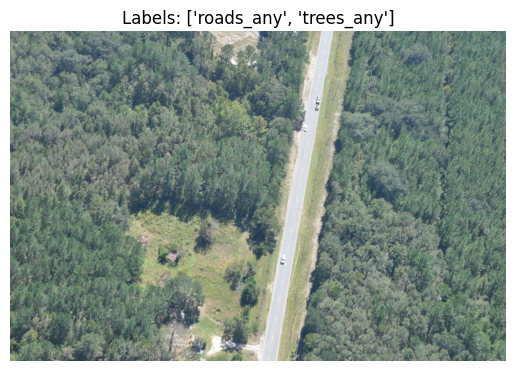

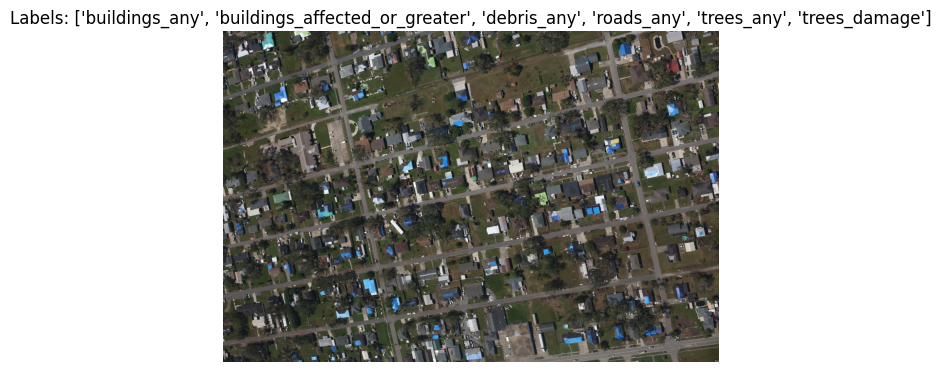

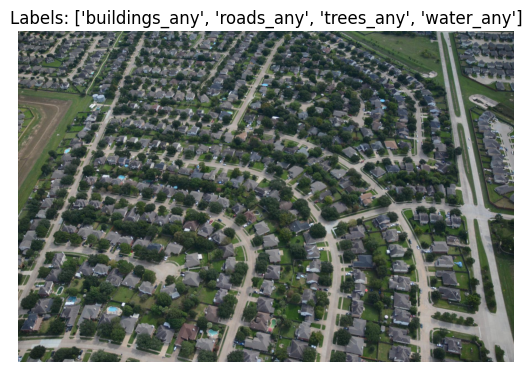

In [11]:
# Function to display images
def show_image(image, title=None):
    plt.imshow(image)
    if title:
        plt.title(title)
    plt.axis('off')  # Hide axis for better visualization
    plt.show()

# Display first 5 images from the dataset
for i, example in enumerate(ds['train']):
    image = example['image']

    # Display the image along with labels
    labels = [key for key, value in example.items() if value and key != 'image']
    show_image(image, title=f"Labels: {labels}")

    if i >= 4:  # Show first 5 images
        break


In [12]:
# Initialize variables to store EDA data
label_columns = ['bridges_any', 'buildings_any', 'buildings_affected_or_greater',
                 'buildings_minor_or_greater', 'debris_any', 'flooding_any',
                 'flooding_structures', 'roads_any', 'roads_damage',
                 'trees_any', 'trees_damage', 'water_any']

In [13]:
label_counts = {label: 0 for label in label_columns}
image_sizes = []

# Count total number of images
total_images = 0

# Iterate over the dataset and collect information
for example in tqdm(ds['train'], desc="Processing Training Data"):
    total_images += 1

    # Update label counts
    for label in label_columns:
        label_counts[label] += int(example[label])

    # Collect image sizes directly from the PIL image object
    try:
        image = example['image']
        image_sizes.append(image.size)  # Collect the size of the image (width, height)
    except Exception as e:
        print(f"Error opening image: {e}")



Processing Training Data: 0it [00:00, ?it/s]

In [14]:
# Convert image sizes to DataFrame for analysis
size_df = pd.DataFrame(image_sizes, columns=['width', 'height'])

In [15]:
size_df.head()

,width,height
0,1800,1200
1,1800,1200
2,1800,1196
3,1800,1200
4,1800,1200


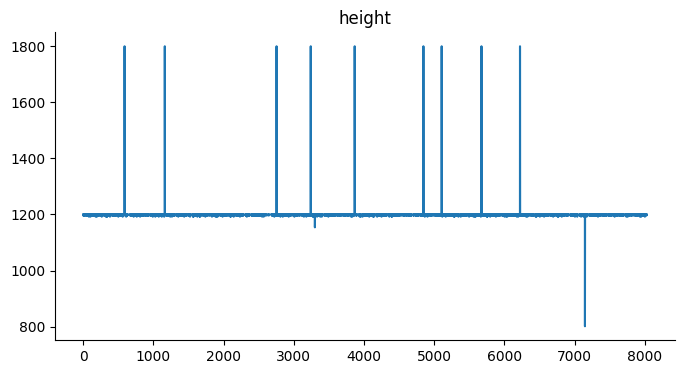

In [17]:
# @title height

from matplotlib import pyplot as plt
size_df['height'].plot(kind='line', figsize=(8, 4), title='height')
plt.gca().spines[['top', 'right']].set_visible(False)

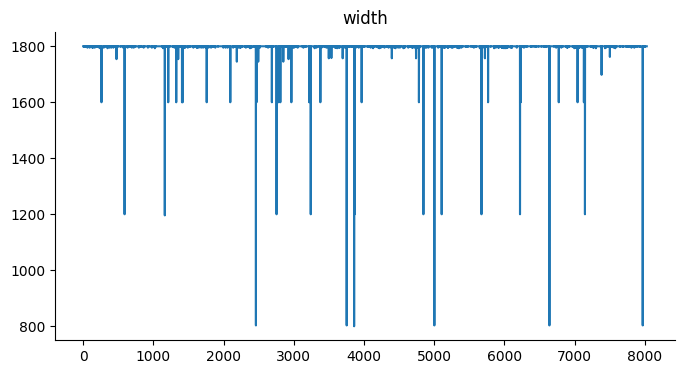

In [16]:
# @title width

from matplotlib import pyplot as plt
size_df['width'].plot(kind='line', figsize=(8, 4), title='width')
plt.gca().spines[['top', 'right']].set_visible(False)

In [18]:
size_df.describe()

,width,height
count,8030.000000,8030.000000
mean,1797.662889,1199.901743
std,36.088788,20.662395
min,800.000000,801.000000
25%,1800.000000,1200.000000
50%,1800.000000,1200.000000
75%,1800.000000,1200.000000
max,1800.000000,1800.000000


In [19]:
size_df.columns

Index(['width', 'height'], dtype='object')

<Axes: >

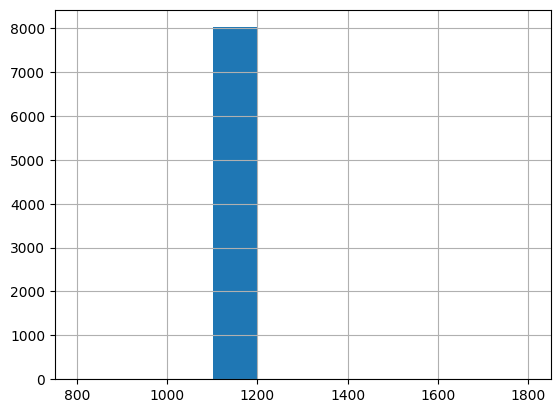

In [20]:
size_df.height.hist()

<Axes: >

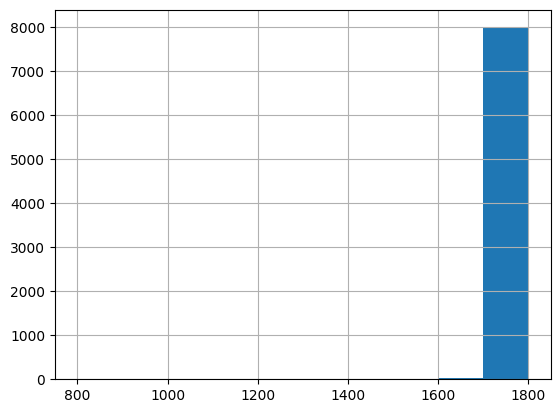

In [21]:
size_df.width.hist()

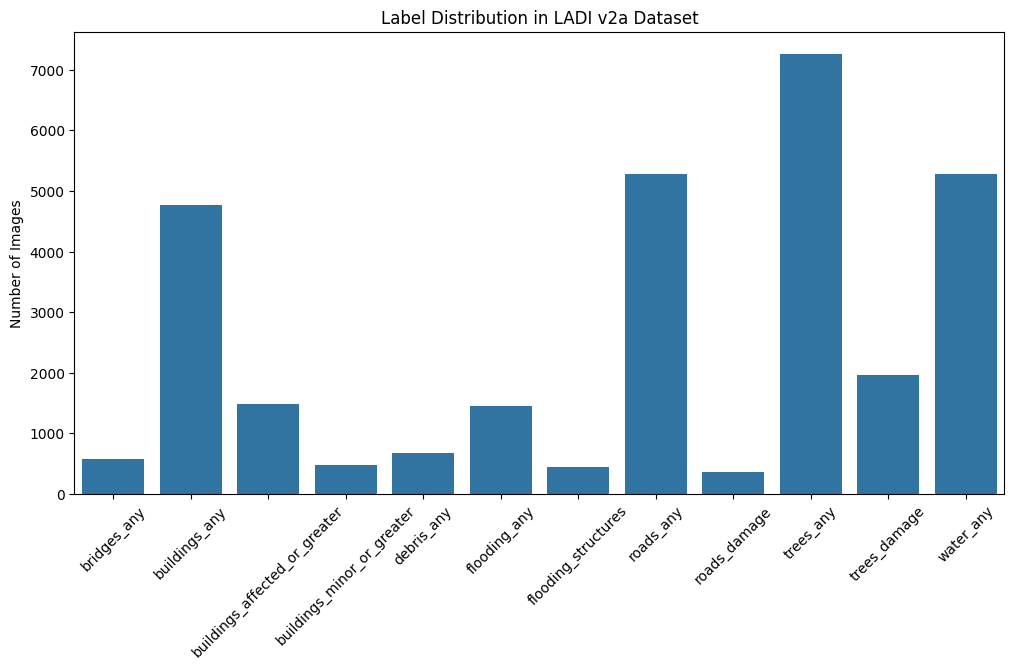

In [22]:
# Bar plot for label distribution
plt.figure(figsize=(12, 6))
sns.barplot(x=list(label_counts.keys()), y=list(label_counts.values()))
plt.title("Label Distribution in LADI v2a Dataset")
plt.xticks(rotation=45)
plt.ylabel("Number of Images")
plt.show()

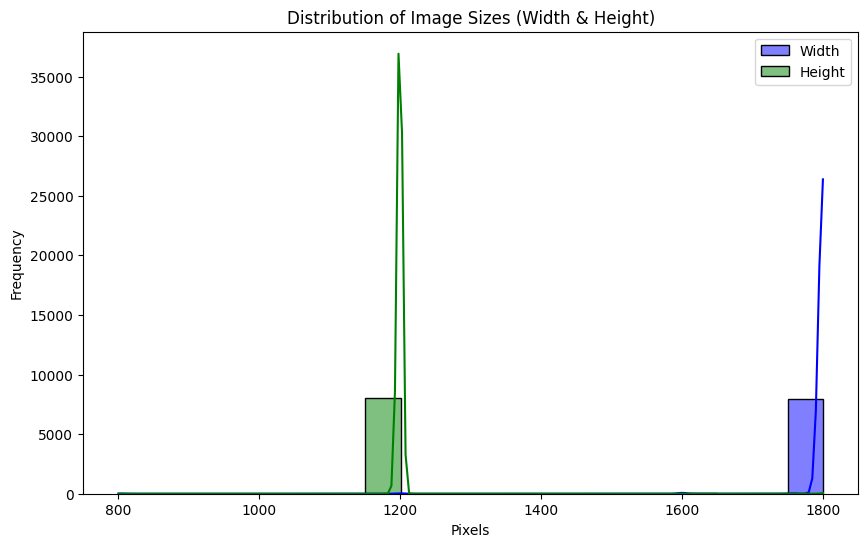

In [23]:
# Plot the distribution of image sizes (width & height)
plt.figure(figsize=(10, 6))
sns.histplot(size_df['width'], bins=20, color='blue', label='Width', kde=True)
sns.histplot(size_df['height'], bins=20, color='green', label='Height', kde=True)
plt.legend()
plt.title("Distribution of Image Sizes (Width & Height)")
plt.xlabel("Pixels")
plt.ylabel("Frequency")
plt.show()

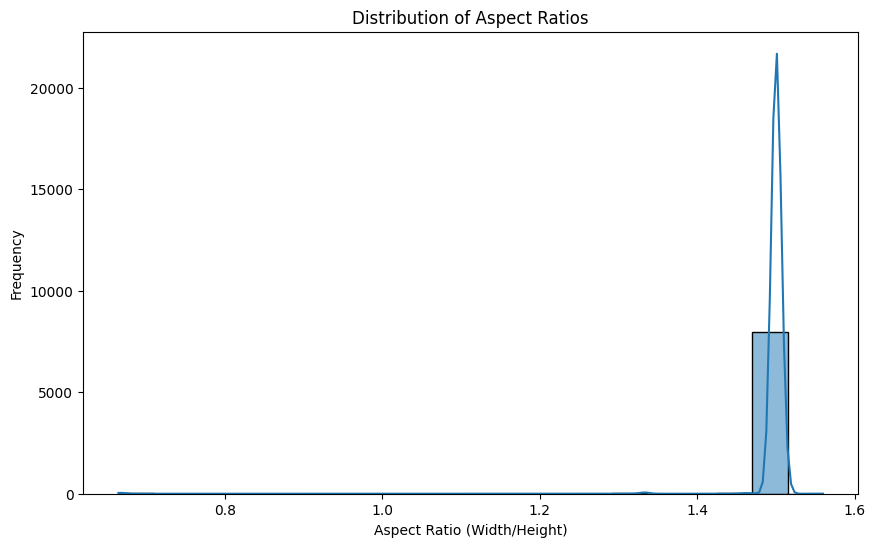

In [24]:
# Aspect ratio analysis
size_df['aspect_ratio'] = size_df['width'] / size_df['height']

plt.figure(figsize=(10, 6))
sns.histplot(size_df['aspect_ratio'], bins=20, kde=True)
plt.title("Distribution of Aspect Ratios")
plt.xlabel("Aspect Ratio (Width/Height)")
plt.ylabel("Frequency")
plt.show()

In [25]:
# Print summary statistics
print(f"Total Images Processed: {total_images}")
print("Label Counts:")
for label, count in label_counts.items():
    print(f"{label}: {count}")

print("Image Size Summary:")
print(size_df.describe())

Total Images Processed: 8030
Label Counts:
bridges_any: 575
buildings_any: 4768
buildings_affected_or_greater: 1488
buildings_minor_or_greater: 476
debris_any: 674
flooding_any: 1455
flooding_structures: 443
roads_any: 5288
roads_damage: 360
trees_any: 7263
trees_damage: 1964
water_any: 5288
Image Size Summary:
             width       height  aspect_ratio
count  8030.000000  8030.000000   8030.000000
mean   1797.662889  1199.901743      1.498646
std      36.088788    20.662395      0.037137
min     800.000000   801.000000      0.664444
25%    1800.000000  1200.000000      1.500000
50%    1800.000000  1200.000000      1.500000
75%    1800.000000  1200.000000      1.500000
max    1800.000000  1800.000000      1.559792
